In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import seaborn as sns
import numpy as np
from numpy import argmax
import glob
import re

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import precision_recall_curve

In [ ]:
# FA up to 6Y

df = pd.read_csv('Z:\\Tami - summaries\\FA_6Y.csv')

In [ ]:
df

,Unnamed: 0,CustomerKey_Encrypt,X,Cohort,birth_year,Gender,Urban,SES_group,Infant_Atopic_Dermatitis,Birth_Season,...,Systemic_steroids,Antihistamines,Topical_steroids,prg_Ameds,prg_Adgnss,prg_Aevent,prg_Aevent_B,prg_Adgnss_B,A_meds,A_meds_B
0,1,00005A8A244422699216118399B17402D02007A32DA58D...,1,0,2007,1,0,1,0,Winter,...,0,0,0,0,0,0,0,0,0,0
1,2,0000B0D61D3865CFAC21B96BB15844ADC9456D6D1011AD...,2,0,2009,0,1,3,0,spring,...,0,0,0,0,0,0,0,0,0,0
2,3,0002BB7D9A3D20E8F02C2A3FAB660532C469EE58846CA1...,3,0,2010,1,0,1,0,Summer,...,0,0,0,0,0,0,0,0,0,0
3,4,00031E6E8D1405615AEFBD165D913F107DF2FF41B3CD3F...,4,0,2015,0,1,1,0,Winter,...,0,0,0,0,0,0,0,0,0,0
4,5,0007B82CB826C768590651DC5FB865C29C54FEC339DFC2...,5,0,2013,0,1,1,0,Autumn,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72693,72694,FFF8D2352CFED4D8895ECF40E9A469642F8703EF4B8372...,72694,0,2007,0,0,1,0,Winter,...,0,0,0,0,0,0,0,0,0,0
72694,72695,FFF8D614500C716992D558F548599434DCF40D1EC95A55...,72695,0,2008,1,0,1,0,spring,...,0,0,0,0,0,0,0,0,0,0
72695,72696,FFFF0C732FDA3E82B7F8CA0F212FE917D771636A3715FE...,72696,0,2016,0,1,4,0,Summer,...,0,0,0,0,0,0,0,0,0,0
72696,72697,FFFF2DD29A67563A8F81C8AEF7FEBAA4B7ED3FBF9A3A5F...,72697,0,2005,1,0,3,0,Autumn,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

df = pd.read_csv('Z:\\Tami - summaries\\FA_3Y.csv')
df

,Unnamed: 0,CustomerKey_Encrypt,urban,Gender,birth_season,birth_year,FA_first_Age,SES_group,milk_alrgy,FA_before_3Y,...,Number.of.atopic.Sib,atopic_parent,FA_parent,systemic.Antibiotics_G,Antihistamines_prgnncy,Antihistamines_prgnncy_b,Antiinflammatory_prgnncy,Antiinflammatory_prgnncy_b,Steroids_prgnncy,Steroids_prgnncy_b
0,1,00005A8A244422699216118399B17402D02007A32DA58D...,0,1,Winter,2007,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0000B0D61D3865CFAC21B96BB15844ADC9456D6D1011AD...,1,0,spring,2009,0,3,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,0002BB7D9A3D20E8F02C2A3FAB660532C469EE58846CA1...,0,1,Summer,2010,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,00031E6E8D1405615AEFBD165D913F107DF2FF41B3CD3F...,1,0,Winter,2015,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,000410F2A456F973AEE2E66550A679A486AAF05B41FDE9...,1,0,spring,2018,0,1,0,0,...,0,0,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87662,87663,FFF980C1C2189ED6F66675B4CE0813AE69AF3DC58ACDA2...,0,1,Summer,2017,0,2,0,0,...,1,0,0,0,0,0,0,0,0,0
87663,87664,FFFADD974A73F65999462F8079C27CA06138E02EA2A3E0...,0,1,Autumn,2018,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
87664,87665,FFFF0C732FDA3E82B7F8CA0F212FE917D771636A3715FE...,1,0,Summer,2016,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
87665,87666,FFFF2DD29A67563A8F81C8AEF7FEBAA4B7ED3FBF9A3A5F...,0,1,Autumn,2005,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Season_dum = pd.get_dummies(df['Birth_Season'])
df = pd.concat([df, Season_dum], axis=1, join='inner')

SES_dum = pd.get_dummies(df['SES_group'])
df = pd.concat([df, SES_dum], axis=1, join='inner')

In [ ]:
df = df.rename(columns={#"systemic.Steroids":"Systemic Steroids During Pregnancy",
                        #  "topicaly.Antibiotics":"Topical Antibiotics During Pregnancy",
                        "FA_6YO": "Cohort", #
                          "Summer":"Season of birth: Summer",
                          "Winter":"Season of birth: Winter",
                          "Autumn":"Season of birth: Autumn",
                          "Sibling_Food_Allergies":"Sibling Food Allergies", #
                          "Parent_Atopic_Condition":"Parent Atopic Condition",
                          "Parent_Food_Allergy":"Parent Food Allergy",
                          "Infant_Atopic_Dermatitis":"Infant Atopic Dermatitis", #
                          "Percent_of_Siblings_with_Atopic":"Percent of Siblings with Atopic", #
                       'Infant_Systemic_Antibiotics':"Infant Systemic Antibiotics", #   ""
                       'Infant_Topical_Antibiotics':"Infant Topical Antibiotics", #
                       "First_Born":"First Born", #
                        "Smoking":"Smoking",
                        "urban":"Urban",
                        1:"Very low SES",
                         2:"Low SES",
                         3:"Medium SES",
                         4:"High SES",
                        "Antibiotics_During_Pregnancy":"Antibiotics During Pregnancy",
                        "prg_Adgnss_B":"Atopic Pregnancy", # prg_Aevent_B
                        "A_meds_B":"Atopic Meds"
                       })

In [ ]:
df = df[(df['birth_year']>=2005)]
print(df.Cohort.value_counts(normalize=True))

0    0.961044
1    0.038956
Name: Cohort, dtype: float64


In [ ]:
list(df.columns)[1:]

['CustomerKey_Encrypt',
 'X',
 'Cohort',
 'birth_year',
 'Gender',
 'Urban',
 'SES_group',
 'Infant Atopic Dermatitis',
 'Birth_Season',
 'Infant Systemic Antibiotics',
 'Infant Topical Antibiotics',
 'Smoking',
 'Number.of.Siblings',
 'Sibling Food Allergies',
 'Percent of Siblings with Atopic',
 'First Born',
 'Parent Atopic Condition',
 'Parent Food Allergy',
 'Antibiotics During Pregnancy',
 'SES',
 'milk_alrgy',
 'age_at_dgnss',
 'last_age',
 'birthdate',
 'Antiinflammatory',
 'Systemic_steroids',
 'Antihistamines',
 'Topical_steroids',
 'prg_Ameds',
 'prg_Adgnss',
 'prg_Aevent',
 'prg_Aevent_B',
 'Atopic Pregnancy',
 'A_meds',
 'Atopic Meds',
 'Season of birth: Autumn',
 'Season of birth: Summer',
 'Season of birth: Winter',
 'spring',
 'Very low SES',
 'Low SES',
 'Medium SES',
 'High SES']

In [ ]:
y = df.Cohort

X = df[['Gender',
 'Urban',
 "Very low SES",
##'Low SES',
 'Medium SES',
 'High SES',
 'Smoking',
 'Parent Atopic Condition',
 'First Born',
 'Sibling Food Allergies',
 'Percent of Siblings with Atopic',
 'Infant Atopic Dermatitis', # variable post birth
 'Infant Systemic Antibiotics', # variable post birth
 'Infant Topical Antibiotics',  # variable post birth
        "Atopic Meds",
  'Antibiotics During Pregnancy',
        "Atopic Pregnancy", #  "prg_Adgnss",
 'Season of birth: Autumn',
 'Season of birth: Summer',
 'Season of birth: Winter' ]]

X = X.apply(pd.to_numeric)

In [ ]:
#balancing

from sklearn.model_selection import train_test_split # Import train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #, random_state=1) # 70% training and 30% test


pos = df[(df['Cohort']==1)]
pos = pos.sample(n=int(len(pos)*0.7), random_state=35 )
neg = df[(df['Cohort']==0)]
neg = neg.sample(n=int(len(pos)*10), random_state=35 )

X_train = pd.concat([pos, neg], axis=0).sample(frac=1, random_state=1)
y_train = X_train['Cohort']
X_train = X_train[X.columns]

print(y_train.value_counts())
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))
print(y_test.value_counts(normalize=False))
print(df.Cohort.value_counts(normalize=True))
print(df.Cohort.value_counts(normalize=False))

0    19820
1     1982
Name: Cohort, dtype: int64
0    0.909091
1    0.090909
Name: Cohort, dtype: float64
0    0.961027
1    0.038973
Name: Cohort, dtype: float64
0    20960
1      850
Name: Cohort, dtype: int64
0    0.961044
1    0.038956
Name: Cohort, dtype: float64
0    69866
1     2832
Name: Cohort, dtype: int64


In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score,auc, classification_report


#rf = RandomForestClassifier(n_estimators=60, max_features='sqrt', max_depth=25, random_state=35)
#rf = RandomForestRegressor()
rf = RandomForestRegressor(n_estimators=15, max_features='sqrt', max_depth=15, random_state=35)

rf.fit(X_train,y_train)
#y_pred = rf.predict(X_test)
TH = 0.3
y_pred = (rf.predict(X_test) > TH).astype('float')


#model result
rf_matrix = confusion_matrix(y_test, y_pred)
print(rf_matrix)
#print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("roc_auc_score:",roc_auc_score(y_test, rf.predict(X_test)))

[[19936  1024]
 [  340   510]]
Accuracy: 0.9374598807886291
Precision: 0.3324641460234681
Recall: 0.6
roc_auc_score: 0.8904169005388416


Text(0.5, 1.0, 'Feature importance - FA up to 6Y')

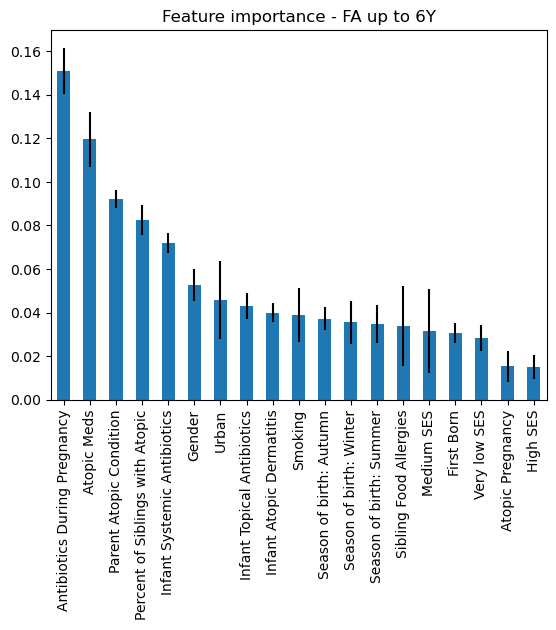

In [ ]:
model = rf
#model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

std = np.std([i.feature_importances_ for i in rf.estimators_], axis=0)

importances = rf.feature_importances_

feat_with_importance = pd.Series(importances, X.columns).nlargest(20)
fig, ax = plt.subplots()
feat_with_importance.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importance - FA up to 6Y")

<AxesSubplot:>

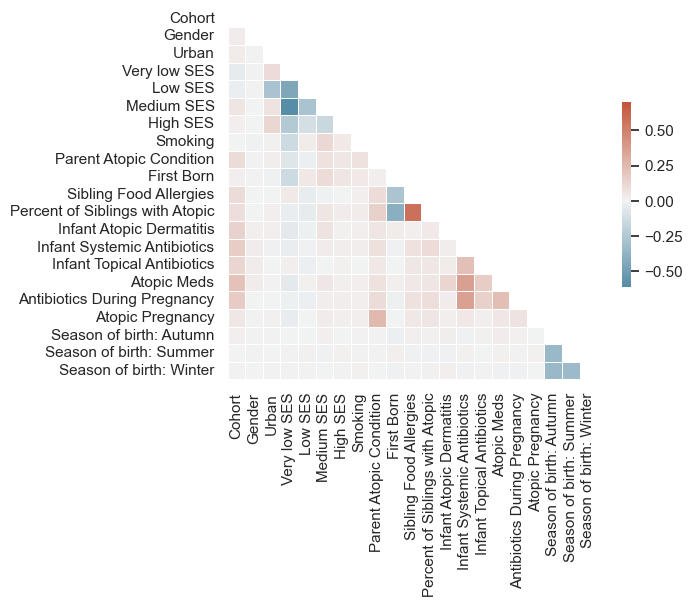

In [ ]:
# Correleation matrix

corr = df[['Cohort',
    'Gender',
 'Urban',
 "Very low SES",
'Low SES',
 'Medium SES',
 'High SES',
 'Smoking',
 'Parent Atopic Condition',
 'First Born',
 'Sibling Food Allergies',
 'Percent of Siblings with Atopic',
 'Infant Atopic Dermatitis', # variable post birth
 'Infant Systemic Antibiotics', # variable post birth
 'Infant Topical Antibiotics',  # variable post birth
        "Atopic Meds",
  'Antibiotics During Pregnancy',
        "Atopic Pregnancy", #  "prg_Adgnss",
 'Season of birth: Autumn',
 'Season of birth: Summer',
 'Season of birth: Winter'
 ]].corr()


sns.set_theme(style="white")

mask=np.triu(np.ones_like(corr, dtype=bool))

ax = plt.subplot()

cmap=sns.diverging_palette(230,20,as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.7, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink":.5})

In [ ]:
# Bootstrap Calculation #

from scipy.stats import sem

ytest = y_test
ytest_len = len(ytest)
indices = range(ytest_len)
ytest.index = indices

model = rf

y_pred = model.predict(X_test)

n_bootstraps = 1000
rng_seed = 42
bootstraped_scores = []

print ("Original AUC: {:0.3f}".format(roc_auc_score(ytest,y_pred)))

rng = np.random.RandomState(rng_seed)
for i in range (n_bootstraps):
    indices = rng.randint(0, len(y_pred), len(y_pred))
    score = roc_auc_score(ytest[indices], y_pred[indices])
    bootstraped_scores.append(score)
    print("Bootstrap #{} AUC: {:0.3f}".format(i+1,score))

Original AUC: 0.890
Bootstrap #1 AUC: 0.894
Bootstrap #2 AUC: 0.885
Bootstrap #3 AUC: 0.897
Bootstrap #4 AUC: 0.896
Bootstrap #5 AUC: 0.895
Bootstrap #6 AUC: 0.895
Bootstrap #7 AUC: 0.891
Bootstrap #8 AUC: 0.894
Bootstrap #9 AUC: 0.885
Bootstrap #10 AUC: 0.881
Bootstrap #11 AUC: 0.896
Bootstrap #12 AUC: 0.890
Bootstrap #13 AUC: 0.893
Bootstrap #14 AUC: 0.893
Bootstrap #15 AUC: 0.892
Bootstrap #16 AUC: 0.896
Bootstrap #17 AUC: 0.886
Bootstrap #18 AUC: 0.900
Bootstrap #19 AUC: 0.888
Bootstrap #20 AUC: 0.888
Bootstrap #21 AUC: 0.889
Bootstrap #22 AUC: 0.902
Bootstrap #23 AUC: 0.891
Bootstrap #24 AUC: 0.887
Bootstrap #25 AUC: 0.891
Bootstrap #26 AUC: 0.889
Bootstrap #27 AUC: 0.887
Bootstrap #28 AUC: 0.882
Bootstrap #29 AUC: 0.883
Bootstrap #30 AUC: 0.895
Bootstrap #31 AUC: 0.885
Bootstrap #32 AUC: 0.887
Bootstrap #33 AUC: 0.889
Bootstrap #34 AUC: 0.902
Bootstrap #35 AUC: 0.891
Bootstrap #36 AUC: 0.886
Bootstrap #37 AUC: 0.893
Bootstrap #38 AUC: 0.885
Bootstrap #39 AUC: 0.891
Bootstrap #40 

In [ ]:
sorted_scores = np.array(bootstraped_scores)
sorted_scores.sort()

confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]

print(confidence_lower, confidence_upper)

0.8791016203744304 0.900816467875065


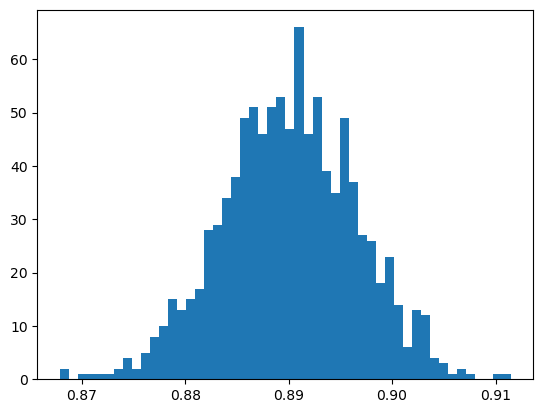

In [ ]:
plt.hist(bootstraped_scores, bins=50)
plt.show()